In [9]:
# train 
# ref: https://chemprop.readthedocs.io/en/latest/cmd.html
import subprocess
# without MDfeautre
n_depths = [2,3,4]
message_hidden_dims = [200,300,400]
ffn_num_layers = [1,2]
ffn_hidden_dims = [200,300,400]
dropouts=[0,0.1,0.2]

# Hyperparameter Tunings
# trial = 0
# for n_depth in n_depths:
#     for message_hidden_dim in message_hidden_dims:
#         for ffn_num_layer in ffn_num_layers:
#             for ffn_hidden_dim in ffn_hidden_dims:
#                 for dropout in dropouts:
#                     command = f"chemprop train --data-path 070324_chemprop_addon.csv --task-type regression --epochs 1000 --num-folds 5 --split CV --save-smiles-splits"
#                     print(trial,command)
#                     trial+=1
#                     subprocess.run(command, shell=True)

# default
# !chemprop train --data-path 062524_chemprop_addon_modifiedF.csv --atom-features-path MDFeatureGen/070124_partialcharge.npz --task-type regression --epochs 1000 --ensemble-size 5 --save-smiles-splits
!chemprop train \
    --data-path 071524_chemprop.csv \
    --task-type regression \
    --epochs 10 \
    --ensemble-size 5 \
    --save-smiles-splits 

    # hyperparameters
    #--depth 4 --message-hidden-dim 200 --ffn-num-layers 1 --ffn-hidden-dim 300 --dropout 0.2
    # MD feature
    # --atom-features-path MDFeatureGen/070124_partialcharge_sigma_epsilon.npz \
    # MD descriptor
    # --descriptors-path MDFeatureGen/070224_surface_area_head_tail.npz \



Wrote config file to chemprop_training\071524_chemprop\2024-11-14T14-20-06\config.toml

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]
                                                                           

Training: |          | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|██████████| 2/2 [00:00<00:00, 17.75it/s, v_num=0, train_loss=0.516]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 681.45it/s]

                                                                       
Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 38.75it/s, v_num=0, train_loss=0.453, val_loss=0.867]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Validation Da

C:\Users\hsk81\miniconda3\envs\env_area_per_molecule\Lib\site-packages\astartes\main.py:325: ImperfectSplittingWarning: Actual train/test split differs from requested size. Requested train size of 0.80, got 0.79. Requested test size of 0.10, got 0.11. 
  warn(
C:\Users\hsk81\miniconda3\envs\env_area_per_molecule\Lib\site-packages\lightning\pytorch\utilities\parsing.py:199: Attribute 'graph_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['graph_transform'])`.
C:\Users\hsk81\miniconda3\envs\env_area_per_molecule\Lib\site-packages\lightning\pytorch\utilities\parsing.py:199: Attribute 'output_transform' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['output_transform'])`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IP

In [2]:
# file scan
import os

def scan_files_in_folders(folders):
    models = []
    for folder in folders:
        print(f"Scanning folder: {folder}")
        for root, _, files in os.walk(folder):
            for file in files:
                if 'last' in file:
                    print(os.path.join(root, file))
                    models.append(os.path.join(root, file))
    return models

# List of folders to scan
folders_to_scan = [
    'chemprop_training/071524_chemprop/2024-11-14T14-20-06'
    # Add more folders as needed
    # 'chemprop_training/062524_chemprop_addon_modifiedF/2024-07-03T11-28-26_pure'
]

models = scan_files_in_folders(folders_to_scan)
# chemprop_training/061324_mydata_chemprop\2024-06-13T23-02-16\model_0\checkpoints\best-epoch=177-val_loss=0.12.ckpt
# chemprop_training/061324_mydata_chemprop\2024-06-14T00-54-13\model_0\checkpoints\best-epoch=164-val_loss=0.12.ckpt


Scanning folder: chemprop_training/071524_chemprop/2024-11-14T14-20-06
chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_0\checkpoints\last.ckpt
chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_1\checkpoints\last.ckpt
chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_2\checkpoints\last.ckpt
chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_3\checkpoints\last.ckpt
chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_4\checkpoints\last.ckpt


In [5]:
# prediction (automated)
test_csv = 'smiles.csv'
xlsx = '071524_chemprop_gammacmc_realgammamaxpure.xlsx'
import subprocess
import pandas as pd
import numpy as np
for idx, model in enumerate(models):
    ########################## chemprop predict ###################################
    print(f'predict: {model}')
    command = f"chemprop predict --test-path {test_csv} --model-path {model}" #--atom-features-path MDFeatureGen/070124_partialcharge_sigma_epsilon.npz --descriptors-path MDFeatureGen/070224_surface_area_head_tail.npz"
    print(command)
    subprocess.run(command, shell=True)
    ########################## end ###################################
    
    # read pred_csv
    df_pred = pd.read_csv(test_csv.split('.')[0]+'_preds_0.csv')
    # rename the columns
    pred_0 = np.mean(df_pred['pred_0']) # supposed to be 1e-6 order
    pred_1 = np.mean(df_pred['pred_1']) # supposed to be > 0
    pred_2 = np.mean(df_pred['pred_2']) # supposed to be < 0
    rename=[]
    for pred in [pred_0, pred_1, pred_2]:
        if pred < 1e-4 and pred>0:
            rename.append('pred_0')
            continue
        if pred > 0 and pred > 1e-4 :
            rename.append('pred_1')
            continue
        if pred < 0 :
            rename.append('pred_2')
            continue
    df_pred = df_pred.rename(columns={'0':'smiles','pred_0': rename[0], 'pred_1': rename[1], 'pred_2': rename[2]})
    
    # add to xlsx file
    df_xlsx =  pd.read_excel(xlsx)
    df_xlsx['pred_0_m'+str(idx)]=df_pred['pred_0']
    df_xlsx['pred_1_m'+str(idx)]=df_pred['pred_1']
    df_xlsx['pred_2_m'+str(idx)]=df_pred['pred_2']
    # output
    # df_xlsx.to_excel(xlsx.split('.')[0]+'_update.xlsx')
    df_xlsx.to_excel(xlsx,index=False)
    

predict: chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_0\checkpoints\last.ckpt
chemprop predict --test-path smiles.csv --model-path chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_0\checkpoints\last.ckpt
predict: chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_1\checkpoints\last.ckpt
chemprop predict --test-path smiles.csv --model-path chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_1\checkpoints\last.ckpt
predict: chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_2\checkpoints\last.ckpt
chemprop predict --test-path smiles.csv --model-path chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_2\checkpoints\last.ckpt
predict: chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_3\checkpoints\last.ckpt
chemprop predict --test-path smiles.csv --model-path chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_3\checkpoints\last.ckpt
predict: chemprop_training/071524_chemprop/2024-11-14T14-20-06\model_4\checkpoin

SurfaceExcess
train
R-squared: 0.9368489541608249
RMSE: 0.4919463668102335
MAE: 0.2893806131342768
test
R-squared: 0.8163847198515762
RMSE: 1.078263369568209
MAE: 0.7285297230287249
gamma CMC
train
R-squared: 0.9464504881656658
RMSE: 1.715903336206694
MAE: 0.9193281561534412
test
R-squared: 0.9037022543266601
RMSE: 2.6399170154500795
MAE: 2.0859106823341653
LogCMC
train
R-squared: 0.9518208139159595
RMSE: 0.20695377084194114
MAE: 0.13885346689327135
test
R-squared: 0.9034522768426992
RMSE: 0.28014192474197547
MAE: 0.20722859357754023


Text(0, 0.5, 'Predicted logCMC (M)')

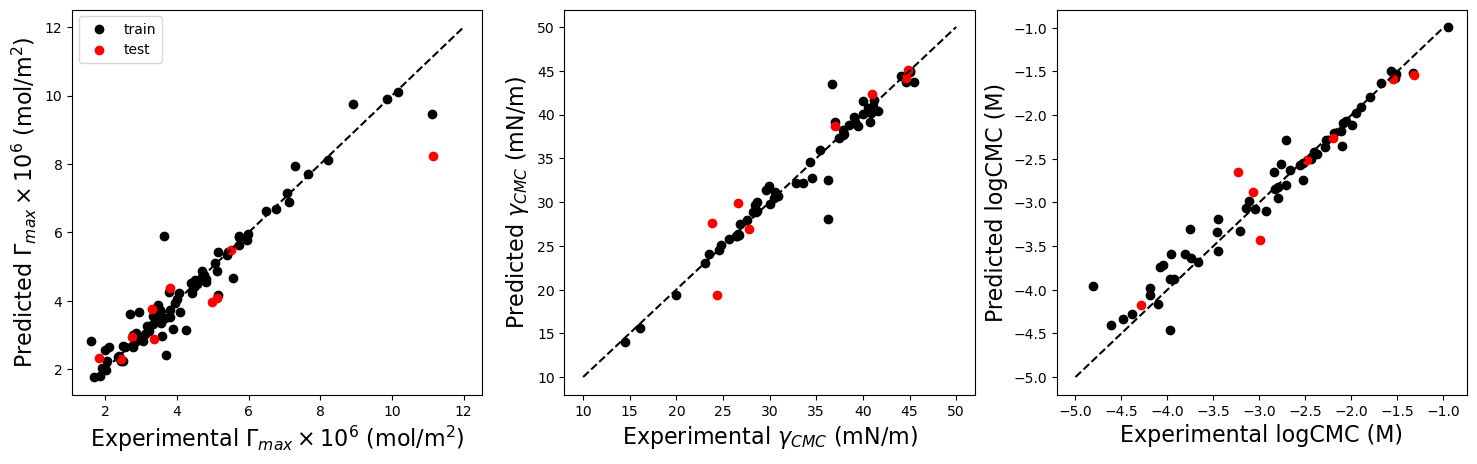

In [ ]:
# metrics
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_excel("071524_chemprop_gammacmc_realgammamaxpure.xlsx")
def parityplot(y_true,y_pred,color,label,ax):
    # Calculate R²
    r2 = r2_score(y_true, y_pred)
    print(f'R-squared: {r2}')

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse}')

    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)
    print(f'MAE: {mae}')

    ax.scatter(y_true,y_pred,color=color,label=label)
    #if label=='test':
    # for i, (true, pred) in enumerate(zip(y_true, y_pred)):
    #     plt.annotate(f'{i}', (true, pred), textcoords="offset points", xytext=(5,5), ha='center')

    ax.set_xlabel('y_true')
    ax.set_ylabel('y_pred')


# df = pd.read_csv('061224_mydata_chemprop_preds_0.csv')
df_train = df[df['test']!=True]
df_test = df[df['test']==True]

fig, ax = plt.subplots(1,3,figsize=(18,5))
#'SurfaceExcess'
print('SurfaceExcess')
print('train')
y_true = df_train['SurfaceExcess (mol/m2)'].to_numpy() 
y_pred = df_train['pred_0'].to_numpy()
parityplot(y_true*1e6,y_pred*1e6,'k','train',ax[0])
print('test')
y_true = df_test['SurfaceExcess (mol/m2)'].to_numpy()
y_pred = df_test['pred_0'].to_numpy()
parityplot(y_true*1e6,y_pred*1e6,'r','test',ax[0])
ax[0].plot([2,12],[2,12],'--k')

ax[0].legend()
ax[0].set_xlabel(r'Experimental $\Gamma_{max}\times 10^6$ (mol/m$^2$)',fontsize=16)
ax[0].set_ylabel(r'Predicted $\Gamma_{max}\times 10^6$ (mol/m$^2$)',fontsize=16)

# gamma_cmc
print('gamma CMC')
print('train')
df_train_CMC = df_train.dropna(subset=['Gamma_cmc (mN/m)'])
df_test_CMC = df_test.dropna(subset=['Gamma_cmc (mN/m)'])
y_true = df_train_CMC['Gamma_cmc (mN/m)'].to_numpy()
y_pred = df_train_CMC['pred_1'].to_numpy()
parityplot(y_true,y_pred,'k','train',ax[1])
print('test')
y_true = df_test_CMC['Gamma_cmc (mN/m)'].to_numpy()
y_pred = df_test_CMC['pred_1'].to_numpy()
parityplot(y_true,y_pred,'r','test',ax[1])
ax[1].plot([10,50],[10,50],'--k')
# ax[2].set_title('logCMC')
ax[1].set_xlabel(r'Experimental $\gamma_{CMC}$ (mN/m)',fontsize=16)
ax[1].set_ylabel(r'Predicted $\gamma_{CMC}$ (mN/m)',fontsize=16)

# LogCMC
print('LogCMC')
print('train')
df_train_CMC = df_train.dropna(subset=['LogCMC (M)'])
df_test_CMC = df_test.dropna(subset=['LogCMC (M)'])
y_true = df_train_CMC['LogCMC (M)'].to_numpy()
y_pred = df_train_CMC['pred_2'].to_numpy()
parityplot(y_true,y_pred,'k','train',ax[2])
print('test')
y_true = df_test_CMC['LogCMC (M)'].to_numpy()
y_pred = df_test_CMC['pred_2'].to_numpy()
parityplot(y_true,y_pred,'r','test',ax[2])
ax[2].plot([-5,-1],[-5,-1],'--k')
# ax[2].set_title('logCMC')
ax[2].set_xlabel('Experimental logCMC (M)',fontsize=16)
ax[2].set_ylabel('Predicted logCMC (M)',fontsize=16)

